In [1]:
import numpy as np
import matplotlib.pyplot as plt
import test_utils

%load_ext autoreload
%autoreload 2

In [2]:
# generate window function
nBlk = 512
nInc = nBlk//2
nFft = nBlk
test_utils.winGen(nBlk)

0x0000,0x0001,0x0004,0x000b,0x0013,0x001e,0x002c,0x003c,0x004f,0x0064,0x007b,0x0095,0x00b2,0x00d0,0x00f2,0x0115,0x013c,0x0164,0x018f,0x01bd,0x01ec,0x021f,0x0253,0x028a,0x02c4,0x0300,0x033e,0x037e,0x03c1,0x0406,0x044e,0x0497,0x04e3,0x0532,0x0583,0x05d5,0x062b,0x0682,0x06dc,0x0737,0x0796,0x07f6,0x0858,0x08bd,0x0923,0x098c,0x09f7,0x0a64,0x0ad3,0x0b44,0x0bb8,0x0c2d,0x0ca4,0x0d1d,0x0d98,0x0e15,0x0e94,0x0f15,0x0f98,0x101d,0x10a4,0x112c,0x11b6,0x1242,0x12d0,0x1360,0x13f1,0x1484,0x1519,0x15af,0x1647,0x16e0,0x177c,0x1818,0x18b7,0x1956,0x19f8,0x1a9a,0x1b3f,0x1be4,0x1c8b,0x1d34,0x1ddd,0x1e88,0x1f35,0x1fe2,0x2091,0x2141,0x21f3,0x22a5,0x2359,0x240d,0x24c3,0x257a,0x2632,0x26eb,0x27a5,0x285f,0x291b,0x29d8,0x2a95,0x2b53,0x2c12,0x2cd2,0x2d93,0x2e54,0x2f16,0x2fd9,0x309c,0x3160,0x3224,0x32e9,0x33ae,0x3474,0x353b,0x3601,0x36c9,0x3790,0x3858,0x3920,0x39e9,0x3ab1,0x3b7a,0x3c43,0x3d0c,0x3dd6,0x3e9f,0x3f68,0x4032,0x40fb,0x41c5,0x428e,0x4357,0x4420,0x44e9,0x45b2,0x467b,0x4743,0x480b,0x48d3,0x499a,0x4a61,0x4b28

In [3]:
Y,S = test_utils.pySim('input.wav',nBlk,nInc,nFft)

In [4]:
Y_C = np.array(test_utils.readCMat('frame.mat')).T
S_C = np.array(test_utils.readCMat('spec.mat')).T

np.shape(Y) = (512, 184)
np.shape(Y_C) = (512, 184)
norm(Y-Y_C) = 9.51032850065e-05
np.shape(S) = (256, 184)
np.shape(S_C) = (256, 184)
norm(S-S_C) = 11.0792779475


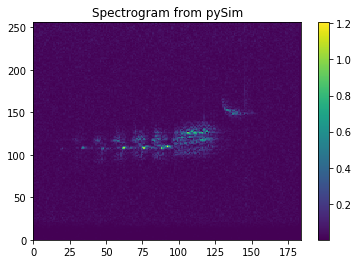

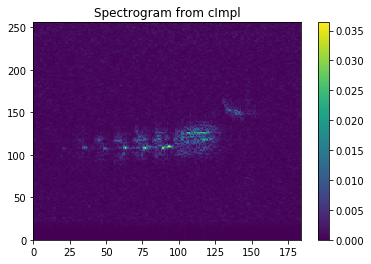

In [5]:
print('np.shape(Y) = ' + str(np.shape(Y)))
print('np.shape(Y_C) = ' + str(np.shape(Y_C)))
print('norm(Y-Y_C) = %s' % np.linalg.norm(Y-Y_C))

print('np.shape(S) = ' + str(np.shape(S)))
print('np.shape(S_C) = ' + str(np.shape(S_C)))
print('norm(S-S_C) = %s' % np.linalg.norm(S-S_C))

fig,ax = plt.subplots()
im = plt.pcolormesh(S)
plt.autoscale(True,'both',True)
fig.colorbar(im,ax=ax)
plt.title('Spectrogram from pySim')

fig,ax = plt.subplots()
im = plt.pcolormesh(S_C)
plt.autoscale(True,'both',True)
fig.colorbar(im,ax=ax)
plt.title('Spectrogram from cImpl')

plt.show()

In [6]:
snrOut_C = np.array(test_utils.readCMat('snrOut.mat')).T

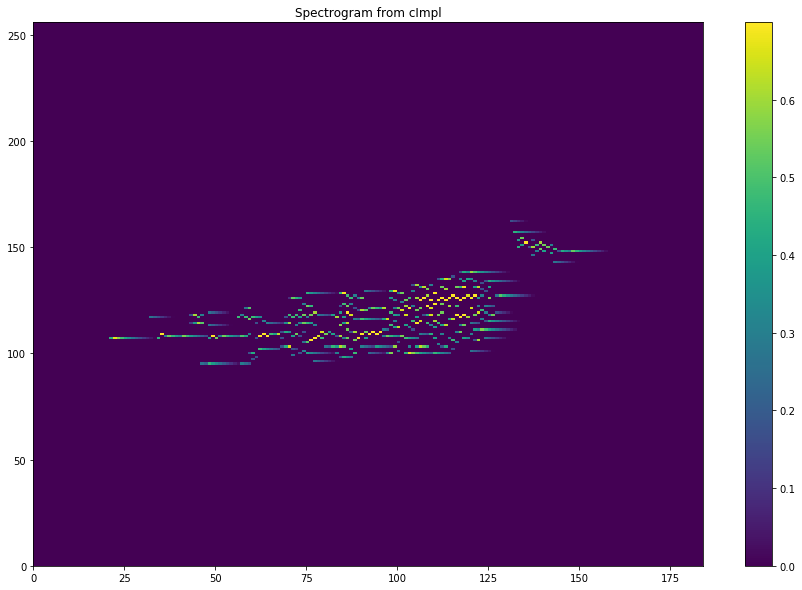

In [7]:
fig,ax = plt.subplots(figsize=(15,10))
im = plt.pcolormesh(snrOut_C)
plt.autoscale(True,'both',True)
fig.colorbar(im,ax=ax)
plt.title('Spectrogram from cImpl')

plt.show()

In [8]:
SNR_C = test_utils.readCMat('SNR.mat')
FI_C = test_utils.readCMat('FI.mat')
TI_C = test_utils.readCMat('TI.mat')

idx = -1
mSNR = np.mean(SNR_C[idx])
print('len(SNR_C[idx]) = %s' % len(SNR_C[idx]))
print('mean(SNR_C[idx]) = %s (%d)' % (mSNR,mSNR*(2**15-1)))

len(SNR_C[idx]) = 641
mean(SNR_C[idx]) = 0.321092444618 (10521)


641


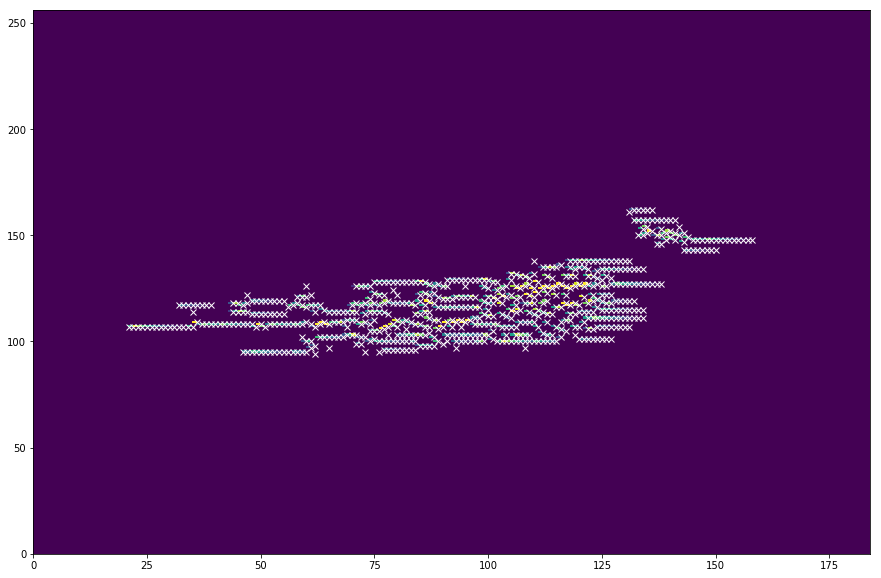

In [9]:
print('%s' % np.sum(snrOut_C>0))

plt.figure(figsize=(15,10))
plt.pcolormesh(snrOut_C)
plt.autoscale(True,'both',True)
for k in range(len(TI_C)):
    plt.plot(TI_C[k],FI_C[k],'wx')
    
plt.show()